## PROJECT GROUP ID: PTID-CDS-FEB-24-1833

# PROJECT ID: PRCP-1002-Handwritten Digits Recognition

## PROBLEM STATEMENT

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

### Task3:- Compare between various models and find the classifier that works better.

## IMPORT NECESSARY LIBRARIES

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
import tensorflow as tf
import math
import datetime
import platform
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATA

In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Explore the data

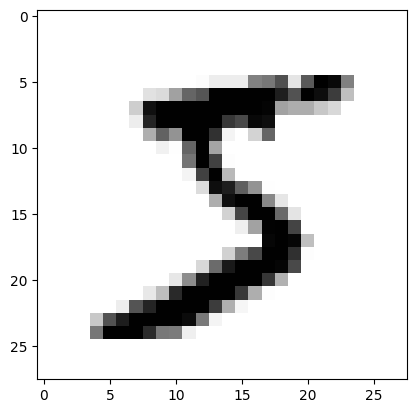

In [6]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

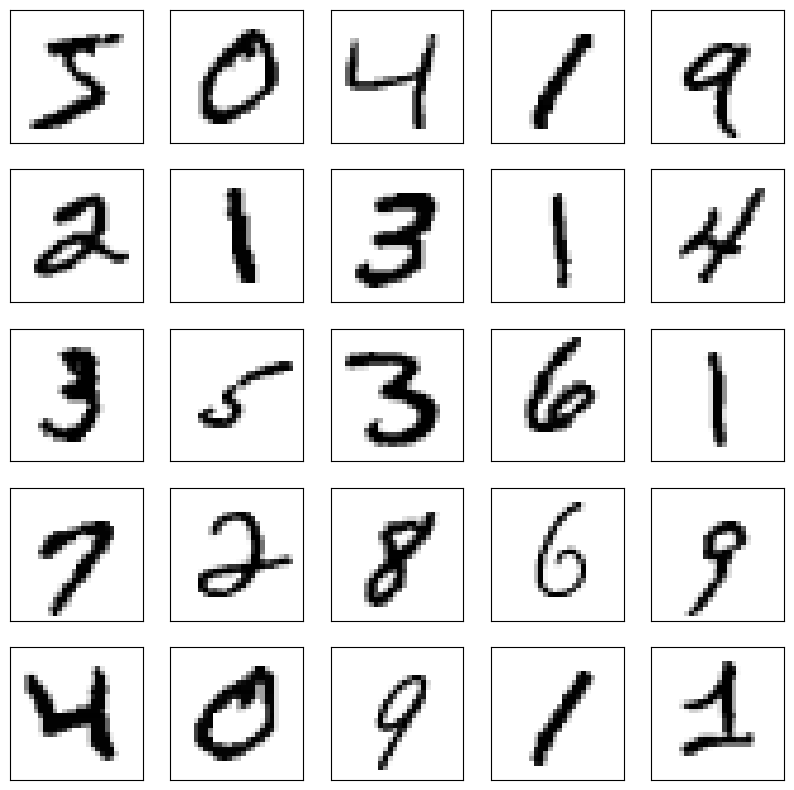

In [7]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [8]:
x_train[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980395],
       [0.7176471 ],
       [0.99215686],
       [0.99215686],
       [0.8117647 ],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

## MODEL BUILDING

## CNN(Convolutional Neural Network)

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=input_shape,
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

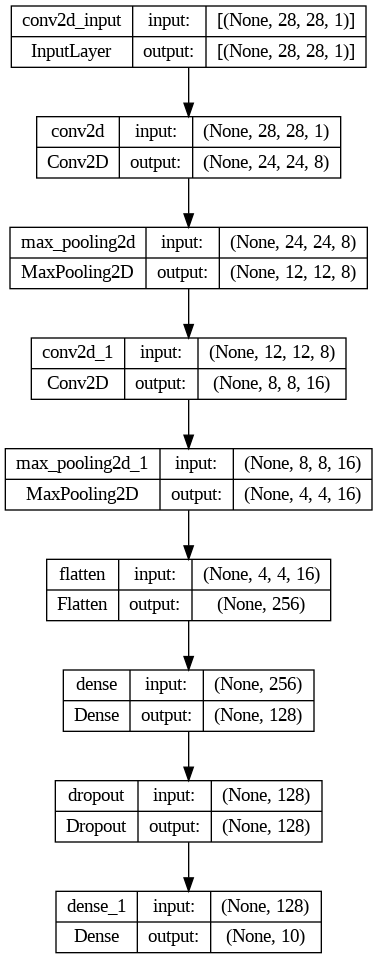

In [11]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

### Compile the model

In [12]:
# Add a Flatten layer before the final Dense layer if your model doesn't already have one
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### Train the model

In [13]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (60000,)
Shape of y_test: (10000,)


In [14]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 16s 5ms/step - loss: 1.3062 - accuracy: 0.5598 - val_loss: 0.8587 - val_accuracy: 0.6030
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7534 - accuracy: 0.5971 - val_loss: 0.6745 - val_accuracy: 0.6038
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6540 - accuracy: 0.6036 - val_loss: 0.6279 - val_accuracy: 0.6025
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6034 - accuracy: 0.6549 - val_loss: 0.5481 - val_accuracy: 0.7086
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5254 - accuracy: 0.7161 - val_loss: 0.4982 - val_accuracy: 0.7156
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4311 - accuracy: 0.8261 - val_loss: 0.2778 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1858 - accuracy: 0.9840 - val_loss: 0.1369 - val_accuracy

## IMAGE VISUALIZATION

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

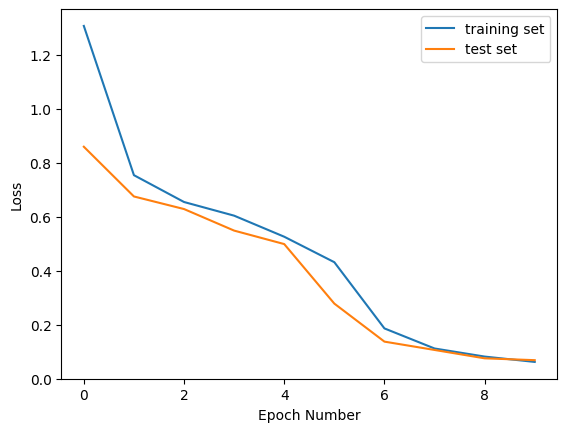

In [15]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

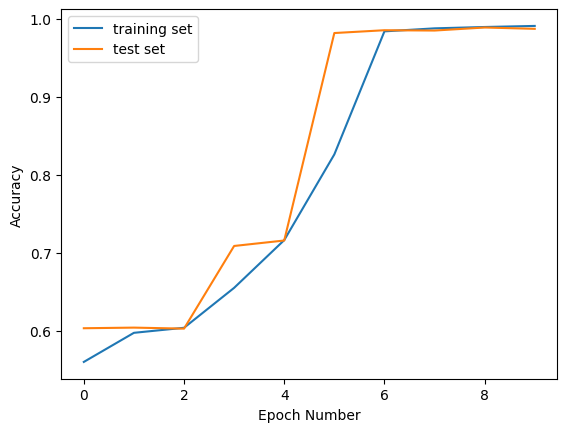

In [16]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [17]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9948


In [18]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.04466775059700012
Training accuracy:  0.9947500228881836


In [19]:
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9873


In [20]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.06821814924478531
Validation accuracy:  0.9872999787330627


## SVM MODEL

#### 1. Linear model

In [21]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [22]:
# Reshape x_train to 2D
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)

# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(x_train_reshaped, y_train)  # Fit the model with reshaped data

# predict
y_pred = model_linear.predict(x_test.reshape(x_test.shape[0], -1)) # Also reshape x_test before predicting

In [23]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9404 

[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16    0    9   12    2]
 [   1    1   10    1  942    2    4    2    3   16]
 [  10    4    3   36    6  803   13    1   14    2]
 [   9    2   13    1    5   16  910    1    1    0]
 [   1    8   21   10    8    1    0  957    3   19]
 [   8    4    6   25    7   26    6    7  877    8]
 [   7    7    2   11   33    4    0   18    5  922]]


#### 2.Poly kernel

In [ ]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(x_train_reshaped, y_train)

# predict
y_pred = non_linear_model_poly.predict(x_test.reshape(x_test.shape[0], -1))

In [ ]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

#### 3.rbf kernel

In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(x_train_reshaped, y_train)

# predict
y_pred = non_linear_model.predict(x_test.reshape(x_test.shape[0], -1))

In [ ]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

### Grid Search: Hyperparameter Tuning

In [ ]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001,0.0001],
                     'C': [1, 10, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True,n_jobs = -1)

# fit the model
model_cv.fit(x_train_reshaped, y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

## ACCURACY OF THE DIFFERENT MODEL:


*   CNN - 98.87
*   SVM -

        1.   LINEAR-94.04
        2.   POLY KERNEL-97.71
        3.   RBF -97.92















In [ ]:
#save model
model_name = 'digits_recognition.h5'
model.save(model_name, save_format='h5')

## prediction

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
predictions_one_hot = loaded_model.predict([x_test])
print('predictions_one_hot:', predictions_one_hot.shape)

In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

In [ ]:
print(predictions[0])

In [ ]:
plt.imshow(x_test[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

## CONCLUSION

- The dataset contains images of different Numbers.
- Here, we tried 4 Optimizers for model creation in which **CNN** shows the highest accuracy score of **98.87%**. Thus we can conclude that it works well for the Handwritten Digit Recognition.
- Thus we can conclude that the CNN model with Adam Optimizer is the best one for predicting the Handwritten Digits Recognition.

# Risks:-

- Data Loading and processing.
- High computational time.
